In [ ]:
#import libraries
import numpy as np
import pandas as pd

np.random.seed(42)
n = 5000

data = pd.DataFrame({
    "age": np.random.randint(21, 65, n),
    "income": np.random.normal(60000, 15000, n).clip(20000, 150000),
    "loan_amount": np.random.normal(20000, 8000, n).clip(2000, 60000),
    "loan_term": np.random.choice([12, 24, 36, 48, 60], n),
    "interest_rate": np.random.uniform(5, 25, n),
    "credit_score": np.random.normal(650, 70, n).clip(300, 850),
    "employment_years": np.random.randint(0, 40, n),
    "debt_to_income": np.random.uniform(0.1, 0.6, n),
    "previous_defaults": np.random.poisson(0.3, n)
})

# Probability of default (non-linear & realistic)
risk = (
    (data["loan_amount"] / data["income"]) +
    (1 - data["credit_score"] / 850) +
    data["debt_to_income"] +
    (data["previous_defaults"] * 0.5)
)

data["default"] = (risk > np.percentile(risk, 75)).astype(int)

data.head()



,age,income,loan_amount,loan_term,interest_rate,credit_score,employment_years,debt_to_income,previous_defaults,default
0,59,38483.019872,22154.964762,12,22.296027,679.781979,3,0.578643,0,1
1,49,44140.007742,12484.150175,12,6.875967,693.374237,13,0.301890,1,0
2,35,53518.144360,16603.027530,60,18.061684,654.989990,14,0.440850,0,0
3,63,83469.296117,34584.972172,24,11.663601,623.848277,19,0.421831,0,0
4,28,56298.740069,23994.897971,24,12.734307,703.907545,19,0.143226,0,0


In [ ]:
#EDA
data.describe()
data.info()
data.isnull().sum()
data.duplicated().sum()
data.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5000 non-null   int64  
 1   income             5000 non-null   float64
 2   loan_amount        5000 non-null   float64
 3   loan_term          5000 non-null   int64  
 4   interest_rate      5000 non-null   float64
 5   credit_score       5000 non-null   float64
 6   employment_years   5000 non-null   int64  
 7   debt_to_income     5000 non-null   float64
 8   previous_defaults  5000 non-null   int64  
 9   default            5000 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 390.8 KB


,age,income,loan_amount,loan_term,interest_rate,credit_score,employment_years,debt_to_income,previous_defaults,default
age,1.000000,0.007139,0.009989,0.013584,0.016279,-0.002157,-0.021686,0.033137,0.020192,0.009318
income,0.007139,1.000000,0.010617,0.029957,0.008751,-0.012041,-0.018738,0.001303,-0.020714,-0.198233
loan_amount,0.009989,0.010617,1.000000,0.004885,0.005423,-0.001674,-0.010952,-0.019447,-0.019039,0.204923
loan_term,0.013584,0.029957,0.004885,1.000000,0.017773,-0.009440,0.028004,0.001840,-0.002260,-0.001978
interest_rate,0.016279,0.008751,0.005423,0.017773,1.000000,0.011112,0.017144,0.005294,0.013713,0.014874
credit_score,-0.002157,-0.012041,-0.001674,-0.009440,0.011112,1.000000,-0.016663,0.017458,0.023671,-0.104444
employment_years,-0.021686,-0.018738,-0.010952,0.028004,0.017144,-0.016663,1.000000,-0.001283,-0.022560,-0.012362
debt_to_income,0.033137,0.001303,-0.019447,0.001840,0.005294,0.017458,-0.001283,1.000000,-0.007912,0.213015
previous_defaults,0.020192,-0.020714,-0.019039,-0.002260,0.013713,0.023671,-0.022560,-0.007912,1.000000,0.694329
default,0.009318,-0.198233,0.204923,-0.001978,0.014874,-0.104444,-0.012362,0.213015,0.694329,1.000000


In [ ]:
#validating feature ranges
for col in data.columns:
    if col != 'default':
        print(f"{col}: {data[col].min()} - {data[col].max()}")

age: 21 - 64
income: 20000.0 - 114865.52705998611
loan_amount: 2000.0 - 45244.303019085055
loan_term: 12 - 60
interest_rate: 5.004027962686209 - 24.996443307229136
credit_score: 420.00336571416767 - 850.0
employment_years: 0 - 39
debt_to_income: 0.10010158259720017 - 0.5999498421511456
previous_defaults: 0 - 4


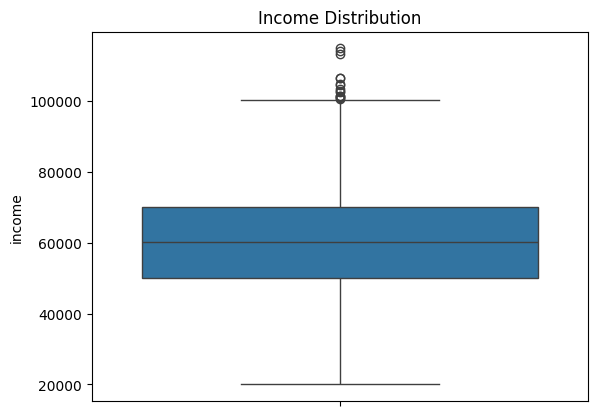

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#outlier inspection
sns.boxplot(data["income"])
plt.title("Income Distribution")
plt.show()


<Figure size 1500x1000 with 0 Axes>

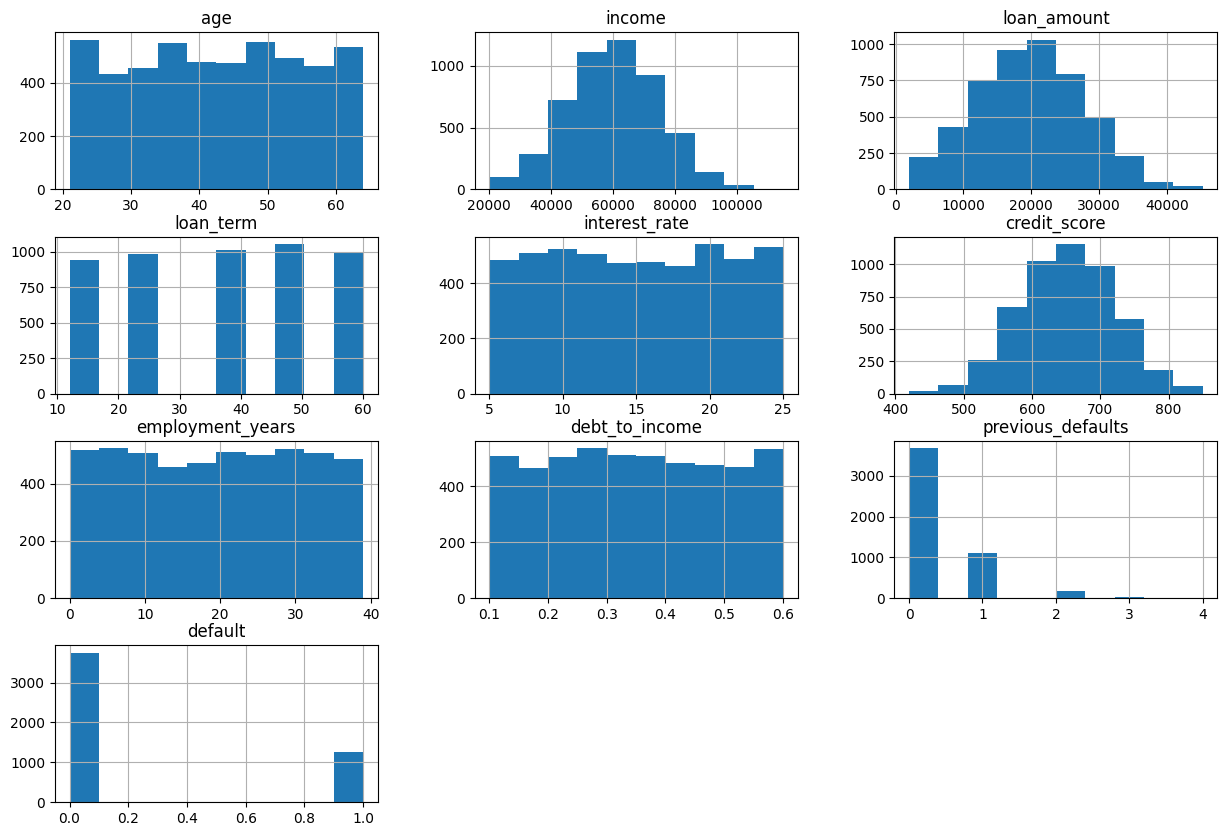

In [ ]:
#EDA using histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
data.hist(figsize=(15, 10))
plt.show()

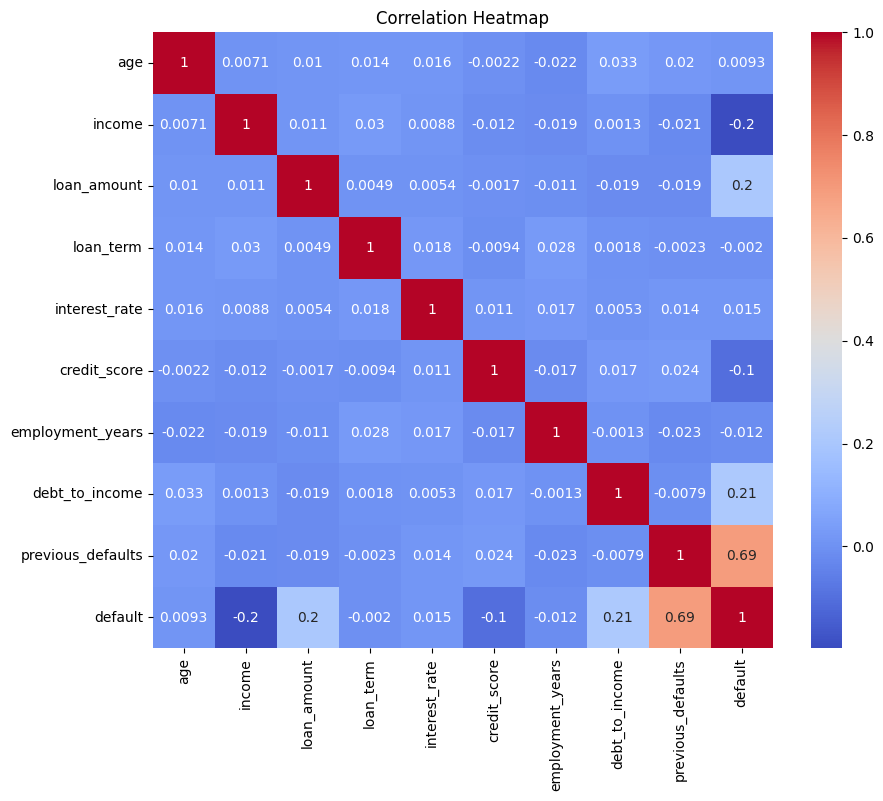

In [ ]:
#EDA using correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#Train test-split
from sklearn.model_selection import train_test_split

X = data.drop('default', axis=1)
y = data['default']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Handle class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [ ]:
#scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)

In [ ]:
#Train baseline model using logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(x_train_scaled, y_train_resampled)

LogisticRegression()

In [ ]:
#Train model using ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [ ]:
#Evaluate Logistic regression model
y_pred = model.predict(x_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.942
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       728
           1       0.83      0.99      0.90       272

    accuracy                           0.94      1000
   macro avg       0.91      0.96      0.93      1000
weighted avg       0.95      0.94      0.94      1000



In [ ]:
#Evaluate ANN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report

# --- Dependencies for data, x_train_scaled and x_test_scaled ---
# Data generation (from cell I5aY4j8y_aU)
import numpy as np
import pandas as pd

np.random.seed(42)
n = 5000

data = pd.DataFrame({
    "age": np.random.randint(21, 65, n),
    "income": np.random.normal(60000, 15000, n).clip(20000, 150000),
    "loan_amount": np.random.normal(20000, 8000, n).clip(2000, 60000),
    "loan_term": np.random.choice([12, 24, 36, 48, 60], n),
    "interest_rate": np.random.uniform(5, 25, n),
    "credit_score": np.random.normal(650, 70, n).clip(300, 850),
    "employment_years": np.random.randint(0, 40, n),
    "debt_to_income": np.random.uniform(0.1, 0.6, n),
    "previous_defaults": np.random.poisson(0.3, n)
})

# Probability of default (non-linear & realistic)
risk = (
    (data["loan_amount"] / data["income"]) +
    (1 - data["credit_score"] / 850) +
    data["debt_to_income"] +
    (data["previous_defaults"] * 0.5)
)

data["default"] = (risk > np.percentile(risk, 75)).astype(int)

# Train test-split (from cell qen8lLduTe-1)
from sklearn.model_selection import train_test_split
X = data.drop('default', axis=1)
y = data['default']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance (from cell 3XGJiuawUNZR)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Scale features (from cell lxJRhC5FWTBY)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)
# --- End of dependencies ---

# Define the ANN model
input_dim = x_train_scaled.shape[1]

model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid') # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
print("Training ANN model...")
model.fit(x_train_scaled, y_train_resampled, epochs=10, batch_size=32, verbose=0)
print("ANN model training complete.")

# Make predictions
y_pred_ann = (model.predict(x_test_scaled) > 0.5).astype("int32")

# Evaluate the ANN model
print("\nANN Accuracy:", accuracy_score(y_test, y_pred_ann))
print("ANN Classification Report:")
print(classification_report(y_test, y_pred_ann))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training ANN model...
ANN model training complete.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

ANN Accuracy: 0.977
ANN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       728
           1       0.93      0.99      0.96       272

    accuracy                           0.98      1000
   macro avg       0.96      0.98      0.97      1000
weighted avg       0.98      0.98      0.98      1000



In [ ]:
#Train model using random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train_scaled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
#Evaluate random forest model
y_pred = model.predict(x_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.953
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       728
           1       0.88      0.96      0.92       272

    accuracy                           0.95      1000
   macro avg       0.93      0.96      0.94      1000
weighted avg       0.96      0.95      0.95      1000



In [ ]:
#create comparison table for all models
from sklearn.metrics import accuracy_score, classification_report
comparison_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'ANN', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_ann
                                                                .ravel()), accuracy_score(y_test, y_pred)],
    'Classification Report': [classification_report(y_test, y_pred), classification_report(y_test, y_pred_ann
                                                                                           .ravel()), classification_report(y_test, y_pred)]
})

comparison_table




,Model,Accuracy,Classification Report
0,Logistic Regression,0.953,precision recall f1-score ...
1,ANN,0.977,precision recall f1-score ...
2,Random Forest,0.953,precision recall f1-score ...


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#hyperparameter tuning random forest

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid={
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_leaf': [1, 2, 4]
    },
    cv=3, # Using 3-fold cross-validation
    scoring='accuracy', # Or 'recall', 'f1', etc., depending on objective
    n_jobs=-1, # Use all available cores
    verbose=1
)

# Assuming you want to run the grid search after defining it
# grid_search.fit(x_train_scaled, y_train_resampled)

In [ ]:
#deploying model
import joblib
from sklearn.preprocessing import StandardScaler


joblib.dump(model, 'loan_default_model.pkl')

In [4]:
import joblib
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# --- Re-create data and preprocessing steps --- #
# Data generation (from cell I5aY4j8y_aU)
np.random.seed(42)
n = 5000

data = pd.DataFrame({
    "age": np.random.randint(21, 65, n),
    "income": np.random.normal(60000, 15000, n).clip(20000, 150000),
    "loan_amount": np.random.normal(20000, 8000, n).clip(2000, 60000),
    "loan_term": np.random.choice([12, 24, 36, 48, 60], n),
    "interest_rate": np.random.uniform(5, 25, n),
    "credit_score": np.random.normal(650, 70, n).clip(300, 850),
    "employment_years": np.random.randint(0, 40, n),
    "debt_to_income": np.random.uniform(0.1, 0.6, n),
    "previous_defaults": np.random.poisson(0.3, n)
})

risk = (
    (data["loan_amount"] / data["income"]) +
    (1 - data["credit_score"] / 850) +
    data["debt_to_income"] +
    (data["previous_defaults"] * 0.5)
)

data["default"] = (risk > np.percentile(risk, 75)).astype(int)

# Train test-split (from cell qen8lLduTe-1)
X = data.drop('default', axis=1)
y = data['default']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance (from cell 3XGJiuawUNZR)
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Scale features (from cell lxJRhC5FWTBY)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)
# --- End of re-creation steps ---

# Re-define and re-train the Random Forest model to ensure 'model' is defined and trained
# Using the same parameters as in cell 'ffUpdWt-vL-X'
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train_scaled, y_train_resampled)

joblib.dump(model, 'loan_default_model.pkl')

['loan_default_model.pkl']

In [6]:
#install streamlit
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.2 MB/s eta 0:00:00


In [8]:
#create streamlit app
import streamlit as st
import joblib
import numpy as np

# Load the trained model
model = joblib.load('loan_default_model.pkl')


In [9]:
#load model
import joblib
model = joblib.load('loan_default_model.pkl')


In [10]:
#sidebar inputs
st.sidebar.header('User Input Features')


2025-12-31 09:09:34.164 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 09:09:34.461 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-12-31 09:09:34.465 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 09:09:34.465 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator(_root_container=1, _parent=DeltaGenerator())